In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/p/software/juwelsbooster/stages/2020/software/Jupyter/2020.2.6-gcccoremkl-9.3.0-2020.2.254-Python-3.8.5/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import thermal_barrierlife_prediction as tbp

In [55]:
ensemble = tbp.EnsembleEstimator()

In [57]:
ensemble.create_models(
    estimator_args=[
        ('CNN_1000', {
            'data': {}, 
            'init': {
                'do_fourier': False, 
                'filters': [8, 16, 32, 64],
                'kernel_size': [3, 3, 3, 3],
                'strides': [1, 1, 1, 1],
                'pool_size': [2, 2, 2, 2],
                'pool_strides': [2, 2, 2, 2],
            }, 
            'train': {'epochs': 1000}}),
    ],
    val_sets=[
        ['M-19-074', 'M-19-104'],
        ['M-19-267', 'M-19-269'],
        ['M-19-271', 'M-19-274'],
        ['M-19-276', 'M-19-280'],
        ['M-19-282', 'M-19-284'],
        
#         ['M-19-104', 'M-19-267'],
#         ['M-19-269', 'M-19-271'],
#         ['M-19-274', 'M-19-276'],
#         ['M-19-280', 'M-19-282'],
#         ['M-19-074', 'M-19-284'],
    ]
)

Epoch 1/1000
Epoch 1/1000
Epoch 1/1000
Epoch 1/1000
Epoch 1/1000
21/21 - 3s - loss: 6660.9331 - mean_squared_error: 6660.9331 - mean_absolute_error: 67.5818 - val_loss: 2661.2000 - val_mean_squared_error: 2661.2000 - val_mean_absolute_error: 47.9154
Epoch 2/1000
23/23 - 4s - loss: 3067.5359 - mean_squared_error: 3067.5359 - mean_absolute_error: 43.6425 - val_loss: 3299.1750 - val_mean_squared_error: 3299.1750 - val_mean_absolute_error: 41.7346
Epoch 2/1000
23/23 - 3s - loss: 3189.9985 - mean_squared_error: 3189.9985 - mean_absolute_error: 46.0947 - val_loss: 3400.4438 - val_mean_squared_error: 3400.4438 - val_mean_absolute_error: 56.9534
Epoch 2/1000
26/26 - 4s - loss: 3381.3367 - mean_squared_error: 3381.3367 - mean_absolute_error: 46.4918 - val_loss: 453.5096 - val_mean_squared_error: 453.5096 - val_mean_absolute_error: 19.4905
Epoch 2/1000
21/21 - 4s - loss: 25268.8359 - mean_squared_error: 25268.8359 - mean_absolute_error: 93.3633 - val_loss: 2390.5896 - val_mean_squared_error: 239

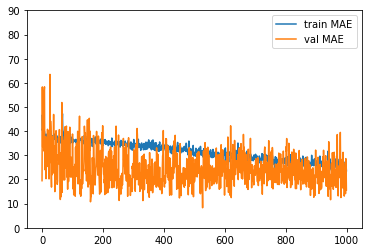

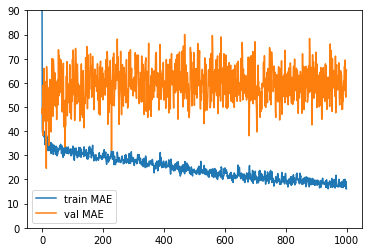

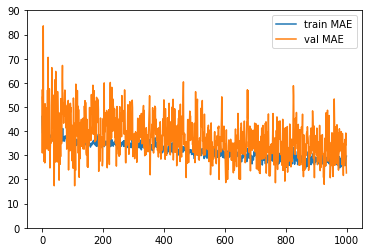

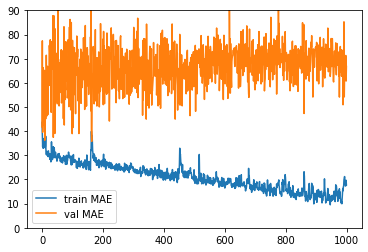

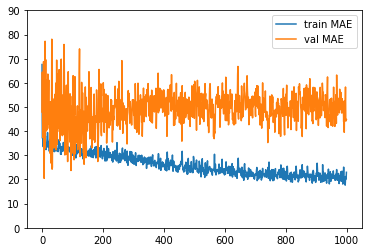

In [58]:
for model in ensemble.res:
    plt.plot(model['estim'].history['mean_absolute_error'], label='train MAE')
    plt.plot(model['estim'].history['val_mean_absolute_error'], label='val MAE')
    plt.ylim(0, 90)
    plt.legend()
    plt.show()

In [65]:
ensemble.evaluate_models(runs=100)
for res in ensemble3.res:
    estim=res['estim']
    print(estim.performance_report['mean_absolute_error'])

18.3111985859118
66.83961424827575
20.865975753120754
68.91886387314908
45.70579971585955


In [75]:
ensemble.predict_val(100)

(53,)


array([119.228355, 141.0605  , 150.04037 , 109.32952 , 113.56528 ,
       104.71334 ,  65.57343 , 109.98454 ,  93.13388 , 119.88063 ,
        91.51893 , 112.52068 , 136.18332 , 122.893074, 100.828384,
       113.14278 , 133.6332  ,  88.17064 , 126.04462 , 127.394966,
       135.98732 ,  68.879616, 120.47569 ,  92.030045, 133.49991 ,
       100.31782 , 143.1833  , 131.47037 , 108.101074, 141.31879 ,
       113.43592 , 101.12304 ,  98.07204 , 135.8421  , 152.90381 ,
        83.6645  , 120.96917 , 125.90777 , 141.12355 , 139.20691 ,
       126.345474, 135.73457 , 143.59755 ,  72.72591 , 138.43785 ,
       126.789894, 152.9967  ,  68.21975 , 130.48508 , 108.00908 ,
       145.91765 ,  81.9205  , 130.61156 ], dtype=float32)

In [7]:
# preds = []
# true = []
# sample = []
# for model in ensemble.estimators['CNN_500']:
#     preds.append(model.predict(list(model.val_samples)))
#     true.append(model.data['lifetime'][model.val_idx])
#     sample.append(model.data['sample'][model.val_idx])
# preds = np.concatenate(preds)
# true = np.concatenate(true)
# sample = np.concatenate(sample)

KeyError: 'CNN_500'

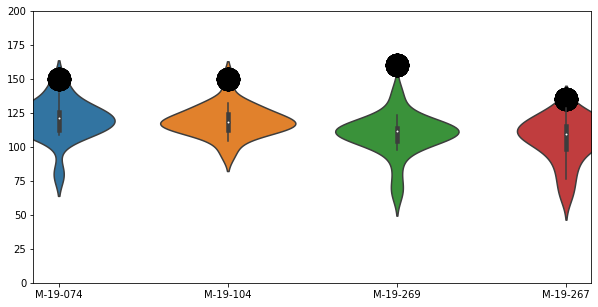

In [49]:
# plt.figure(figsize=(10,5))
# sns.violinplot(x=sample, y=preds)
# # plt.scatter(x=sample, y=preds)
# plt.scatter(x=sample, y=true, c='black', s=500)
# plt.ylim(0, 200)
# plt.show()